# Assignment 2 - Linear Regression

Objective:

In this assignment, you will explore the concept of linear regression, learn how to implement it using Python, and evaluate a model’s performance. By the end of this assignment, you should be able to:

* Understand the theoretical foundations of linear regression.
* Implement linear regression using Scikit-learn.
* Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).


Instructions:

Complete each of the tasks below. Download and upload your Jupyter notebook containing your code **and output** along with all answers to your github classroom repository. Add, commit, and push the notebook before the due date.

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Part 1: Linear Regression Concepts (10 points)

**Question: Explain what linear regression is and describe a real-world example where linear regression could be applied.**

YOUR ANSWER: Linear regression is a model where you estimate the linear relationship between one or more independent variables to predict the outcome of a dependent variable. An example of this is trying to predict someone's weight off of factors such as height and age.

## Part 2: Linear Regression with Sklearn (85 points)

For this assignment you'll be working with a Housing dataset. Your data for this assignment is in iris_data.csv. You may need to read more about the dataset in order to map the variables in the data.

### A. Load the data (10 points)
Load the [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) dataset from Kaggle. You may need to download the dataset and move it to your working location in order to read it in.


In [10]:
df = pd.read_csv('housing_train.csv', na_values=['NA'])
label = 'SalePrice'
y = df[label]
X = df.drop(label, axis=1)

**Question: What is the House Prices dataset?**

YOUR ANSWER: The House Prices dataset is a dataset that has 79 variables along with the target variable of the final house price of residential homes in Ames, Iowa.

### (optional) Train/Test Split the Data (5 bonus points)


For extra points, split into training and testing. Use the training dataset to perform EDA (exploratory data analysis) and fit the model. Predict on the test dataset and evaluate model performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### B. Visualize Target Variable (5 points)
Create a histogram of the target variable, `SalesPrice`

<function matplotlib.pyplot.show(close=None, block=None)>

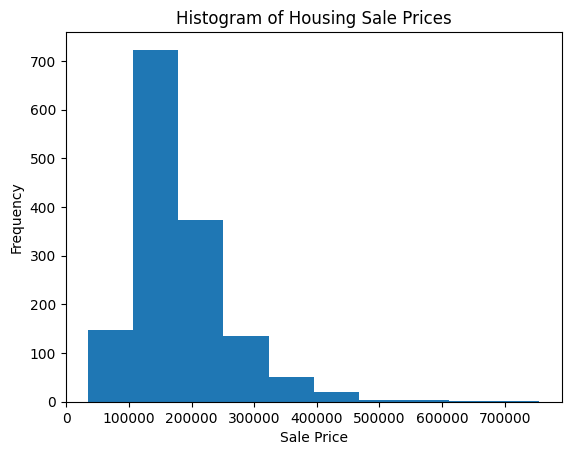

In [15]:
# YOUR CODE HERE
plt.hist(y)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Sale Prices')
plt.show

### C. Visualize Feature (5 points)
Create a visualization of one feature:
* **GrLivArea:** Above grade (ground) living area square feet

<function matplotlib.pyplot.show(close=None, block=None)>

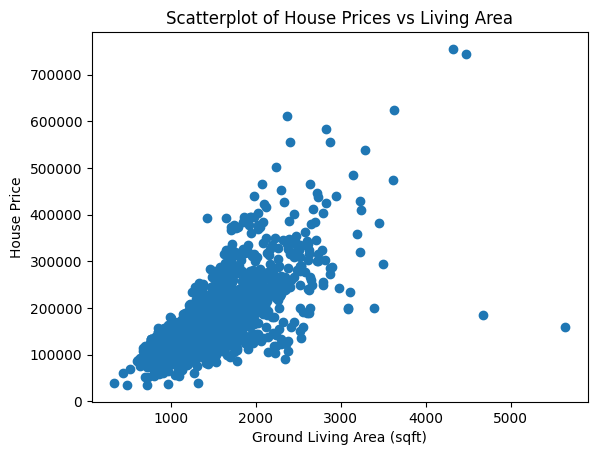

In [18]:
# YOUR CODE HERE
plt.scatter(df["GrLivArea"], y)
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('House Price')
plt.title('Scatterplot of House Prices vs Living Area')
plt.show

### D. Fit a Simple Linear Regression Model (5 points)
Create a linear model with just one X variable input: GrLivArea.

In [87]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# YOUR CODE HERE
model.fit(X_train["GrLivArea"].values.reshape(-1, 1), y_train)

LinearRegression()

### E. Score the Model (5 points)
Run predict on the fitted model. Pass the predictions to the mean squared error scoring function: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [89]:
# YOUR CODE HERE
y_pred = model.predict(X_test["GrLivArea"].values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mse

3418946311.180807

### F. Plot the Fitted Line (10 points)
Plot the X feature, GrLivArea, on the X axis and the Y label, SalesPrice, on the Y axis. Add the model line to the visualization.

<function matplotlib.pyplot.show(close=None, block=None)>

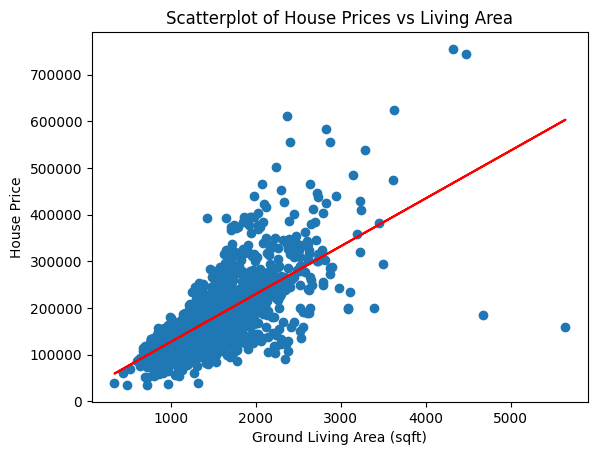

In [73]:
# YOUR CODE HERE
plt.scatter(df["GrLivArea"], y)

fitted_line = (model.coef_*df["GrLivArea"]) + model.intercept_
plt.plot(df["GrLivArea"],fitted_line, color = 'r')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('House Price')
plt.title('Scatterplot of House Prices vs Living Area')
plt.show

**Question (5 points):** What is the weight and bias or your model? What is the formula?

YOUR ANSWER:
* Weight: 102.49
* Bias: 24,899.75
* Formula: y_hat = 24899.75 + 102.49*X

In [57]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 24899.74815733818
Coefficients: [102.48895892]


### G. Add More Features (20 points)

The goal of this exercise is to compile a table of results -- MSE computed for 5 models:
1. features = GrLivArea
2. features = GrLivArea, Feature2
3. features = GrLivArea, Feature2, Feature3
4. features = GrLivArea, Feature2, Feature3, Feature4

Select 4 additional features of your personal choice.

In [90]:
print(f"One Feature MSE: {mse}")

two_feat = X_train[["GrLivArea", "OverallQual"]]
model2 = LinearRegression()
model2.fit(two_feat, y_train)
y_pred2 = model2.predict(X_test[["GrLivArea", "OverallQual"]])
print(f"Two Feature MSE: {mean_squared_error(y_test, y_pred2)}")

three_feat = X_train[["GrLivArea", "OverallQual", "OverallCond"]]
model3 = LinearRegression()
model3.fit(three_feat, y_train)
y_pred3 = model3.predict(X_test[["GrLivArea", "OverallQual", "OverallCond"]])
print(f"Three Feature MSE: {mean_squared_error(y_test, y_pred3)}")

four_feat = X_train[["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF"]]
model4 = LinearRegression()
model4.fit(four_feat, y_train)
y_pred4 = model4.predict(X_test[["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF"]])
print(f"Four Feature MSE: {mean_squared_error(y_test, y_pred4)}")

five_feat = X_train[["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF", "YrSold"]]
model5 = LinearRegression()
model5.fit(five_feat, y_train)
y_pred5 = model5.predict(X_test[["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF", "YrSold"]])
print(f"Five Feature MSE: {mean_squared_error(y_test, y_pred5)}")

One Feature MSE: 3418946311.180807
Two Feature MSE: 1950070708.6601996
Three Feature MSE: 1950505300.6973174
Four Feature MSE: 1656307880.0724988
Five Feature MSE: 1660294685.6122649


**Question:** Enter your model results in the grid below

*Written answer:*

Model          | MSE
---            | ---
GrLivArea      | 3,418,946,311
OverallQual | 1,950,070,708
OverallCond  | 1,950,505,300
YearRemodAdd   | 1,656,307,880
TotalBsmtSF | 1,660,294,685